## 6.01 - Supervised Learning Model Comparison

Recall the "data science process."

1. Define the problem.
2. Gather the data.
3. Explore the data.
4. Model the data.
5. Evaluate the model.
6. Answer the problem.

In this lab, we're going to focus mostly on creating (and then comparing) many regression and classification models. Thus, we'll define the problem and gather the data for you.

Most of the questions requiring a written response can be written in 2-3 sentences.

### Step 1: Define the problem.

You are a data scientist with a financial services company. Specifically, you want to leverage data in order to identify potential customers.

If you are unfamiliar with "401(k)s" or "IRAs," these are two types of retirement accounts. Very broadly speaking:
- You can put money for retirement into both of these accounts.
- The money in these accounts gets invested and hopefully has a lot more money in it when you retire.
- These are a little different from regular bank accounts in that there are certain tax benefits to these accounts. Also, employers frequently match money that you put into a 401k.
- If you want to learn more about them, check out [this site](https://www.nerdwallet.com/article/ira-vs-401k-retirement-accounts).

We will tackle one regression problem and one classification problem today.
- Regression: What features best predict one's income?
- Classification: Predict whether or not one is eligible for a 401k.

Check out the data dictionary [here](http://fmwww.bc.edu/ec-p/data/wooldridge2k/401KSUBS.DES).

### NOTE: When predicting `inc`, you should pretend as though you do not have access to the `e401k`, the `p401k` variable, and the `pira` variable. When predicting `e401k`, you may use the entire dataframe if you wish.

In [43]:
import pandas as pd
import numpy as np

### Step 2: Gather the data.

##### 1. Read in the data from the repository.

In [44]:
df = pd.read_csv('./401ksubs.csv')

In [45]:
df.head()

,e401k,inc,marr,male,age,fsize,nettfa,p401k,pira,incsq,agesq
0,0,13.170,0,0,40,1,4.575,0,1,173.4489,1600
1,1,61.230,0,1,35,1,154.000,1,0,3749.1130,1225
2,0,12.858,1,0,44,2,0.000,0,0,165.3282,1936
3,0,98.880,1,1,44,2,21.800,0,0,9777.2540,1936
4,0,22.614,0,0,53,1,18.450,0,0,511.3930,2809


##### 2. What are 2-3 other variables that, if available, would be helpful to have?

Other helpful variables would be 'Number of Properties Owned' and 'Length of Service'.

##### 3. Suppose a peer recommended putting `race` into your model in order to better predict who to target when advertising IRAs and 401(k)s. Why would this be an unethical decision?

We should not discriminate on the basis of race.

## Step 3: Explore the data.

##### 4. When attempting to predict income, which feature(s) would we reasonably not use? Why?

Family size `fsize` generally does not affect the amount of income. They are not directly related.

##### 5. What two variables have already been created for us through feature engineering? Come up with a hypothesis as to why subject-matter experts may have done this.
> This need not be a "statistical hypothesis." Just brainstorm why SMEs might have done this!

`incsq` and `agesq`. They do this to better represent the underlying patterns in the data. By squaring income and age, it can help uncover nonlinear relationships and improve the predictive performance of the model.

##### 6. Looking at the data dictionary, one variable description appears to be an error. What is this error, and what do you think the correct value would be?

In [46]:
df.dtypes

e401k       int64
inc       float64
marr        int64
male        int64
age         int64
fsize       int64
nettfa    float64
p401k       int64
pira        int64
incsq     float64
agesq       int64
dtype: object

The variable labels for `inc` and `age` are indicated as inc^2 and age^2 respectively. These labellings are wrong.

Should be: 

`inc` : Yearly income (in thousands)

`age` : Age of person

## Step 4: Model the data. (Part 1: Regression Problem)

Recall:
- Problem: What features best predict one's income?
- When predicting `inc`, you should pretend as though you do not have access to the `e401k`, the `p401k` variable, and the `pira` variable.

##### 7. List all modeling tactics we've learned that could be used to solve a regression problem (as of Wednesday afternoon of Week 6). For each tactic, identify whether it is or is not appropriate for solving this specific regression problem and explain why or why not.

- Linear Regression: Appropriate for sure
- Decision Tree: Appropriate for this regression problem
- Bootstrapping and Bagging: Appropriate for this problem
- Random Forests: Appropriate
- Ada and Gradient Boosting: Gradient Boost is appropriate

##### 8. Regardless of your answer to number 7, fit at least one of each of the following models to attempt to solve the regression problem above:
    - a multiple linear regression model
    - a k-nearest neighbors model
    - a decision tree
    - a set of bagged decision trees
    - a random forest
    - an Adaboost model
    - a support vector regressor
    
> As always, be sure to do a train/test split! In order to compare modeling techniques, you should use the same train-test split on each. I recommend setting a random seed here.

> You may find it helpful to set up a pipeline to try each modeling technique, but you are not required to do so!

In [47]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV

In [48]:
# Define X and y.
X = df.drop(columns=['inc','e401k','p401k','pira','incsq'])
y = df['inc']

In [49]:
# Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)
# not sure why stratify does not work here

In [50]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [51]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

##### 9. What is bootstrapping?

Basically means sampling with replacement. For example, in the bagging context, lets say we have 100 rows in the train data. To do bootstrapping on this train data means that we create another table(tree) by selecting 100 random rows each time from the train data such that we might have repeated rows.

##### 10. What is the difference between a decision tree and a set of bagged decision trees? Be specific and precise!

Decision tree only uses one tree. But in a set of bagged decision trees, we apply bootstrapping on the train data by selecting random rows to get Tree 1. Then we repeat the process until we get Tree 2, Tree 3 and so on. Then we find the aggregate of all the trees.

##### 11. What is the difference between a set of bagged decision trees and a random forest? Be specific and precise!

In a set of bagged decision trees, we use every feature/column from the train data. In random forest, we pick a random subset of features/columns for splitting at each node.

##### 12. Why might a random forest be superior to a set of bagged decision trees?
> Hint: Consider the bias-variance tradeoff.

In random forest, we pick a random subset of columns/features for each split. This effectively makes our individual decision trees less correlated. Thus, a random forest usually has less variance than a set of bagged decision trees.

## Step 5: Evaluate the model. (Part 1: Regression Problem)

##### 13. Using RMSE, evaluate each of the models you fit on both the training and testing data.

In [52]:
from sklearn.metrics import mean_squared_error

In [53]:
# make predictions on the train set for dt
dt_train_pred = dt.predict(X_train)
# make predictions on the test set for dt
dt_test_pred = dt.predict(X_test)

In [54]:
# calculate RMSE for dt
dt_train_rmse = np.sqrt(mean_squared_error(y_train, dt_train_pred))
dt_test_rmse = np.sqrt(mean_squared_error(y_test, dt_test_pred))
print("DT Train RMSE:", dt_train_rmse)
print("DT Test RMSE:", dt_test_rmse)

DT Train RMSE: 2.2638130048030134
DT Test RMSE: 27.333701510152455


In [55]:
# make predictions on the train set for rf
rf_train_pred = rf.predict(X_train)
# make predictions on the test set for rf
rf_test_pred = rf.predict(X_test)

In [56]:
# calculate RMSE for rf
rf_train_rmse = np.sqrt(mean_squared_error(y_train, rf_train_pred))
rf_test_rmse = np.sqrt(mean_squared_error(y_test, rf_test_pred))
print("RF Train RMSE:", rf_train_rmse)
print("RF Test RMSE:", rf_test_rmse)

RF Train RMSE: 7.745045887911204
RF Test RMSE: 20.366680568121332


##### 14. Based on training RMSE and testing RMSE, is there evidence of overfitting in any of your models? Which ones?

Yes, there is overfitting. The train RMSE is much lower than the test RMSE. This model is generalising poorly on unseen data.

##### 15. Based on everything we've covered so far, if you had to pick just one model as your final model to use to answer the problem in front of you, which one model would you pick? Defend your choice.

Our random forest is less overfitted compared to our decision tree. So we will pick random forest.

##### 16. Suppose you wanted to improve the performance of your final model. Brainstorm 2-3 things that, if you had more time, you would attempt.

- Tune models using GridSearchCV
- Feature engineer other columns other than income and age
- Using logarithm to transform the y variable

## Step 4: Model the data. (Part 2: Classification Problem)

Recall:
- Problem: Predict whether or not one is eligible for a 401k.
- When predicting `e401k`, you may use the entire dataframe if you wish.

##### 17. While you're allowed to use every variable in your dataframe, mention at least one disadvantage of using `p401k` in your model.

The `p401k` column shows whether each person is already participating in 401k. If the person is already participating in 401k, it should mean that he is also eligible for 401k. Thus, it is not meaningful to use this `p401k` variable to predict whether one is eligible for a 401k.

##### 18. List all modeling tactics we've learned that could be used to solve a classification problem (as of Wednesday afternoon of Week 6). For each tactic, identify whether it is or is not appropriate for solving this specific classification problem and explain why or why not.

- Logistic Regression: Appropriate
- KNN: Appropriate
- Decision Tree: Appropriate
- Bootstrapping & Bagging: Appropriate
- Random Forest: Appropriate
- Adaboost: Appropriate

##### 19. Regardless of your answer to number 18, fit at least one of each of the following models to attempt to solve the classification problem above:
    - a logistic regression model
    - a k-nearest neighbors model
    - a decision tree
    - a set of bagged decision trees
    - a random forest
    - an Adaboost model
    - a support vector classifier
    
> As always, be sure to do a train/test split! In order to compare modeling techniques, you should use the same train-test split on each. I recommend using a random seed here.

> You may find it helpful to set up a pipeline to try each modeling technique, but you are not required to do so!

In [57]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier

In [58]:
X = df.drop(columns=['e401k', 'p401k'])
y = df['e401k']

In [59]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.2,
    random_state = 42
)

In [60]:
bg = BaggingClassifier()
bg.fit(X_train, y_train)

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

ab = AdaBoostClassifier()
ab.fit(X_train, y_train)

AdaBoostClassifier()

## Step 5: Evaluate the model. (Part 2: Classfication Problem)

##### 20. Suppose our "positive" class is that someone is eligible for a 401(k). What are our false positives? What are our false negatives?

False positives - number of people who we predicted to be eligible, but in fact not eligible

False negatives - number of people who we predicted to not be eligible, but in fact they are eligible

##### 21. In this specific case, would we rather minimize false positives or minimize false negatives? Defend your choice.

Since we are working for a financial service company, we want to minimize cost. So if we predict people to be eligible but in fact they are not eligible, we might waste resources. So we want to minimize false positives.

##### 22. Suppose we wanted to optimize for the answer you provided in problem 21. Which metric would we optimize in this case?

We want to optimize specificity.

Specificity = TN / (TN + FP)

##### 23. Suppose that instead of optimizing for the metric in problem 21, we wanted to balance our false positives and false negatives using `f1-score`. Why might [f1-score](https://en.wikipedia.org/wiki/F1_score) be an appropriate metric to use here?

$$
\begin{align}
F_1 &=& \frac{2}{\frac{1}{\text{precision}} + \frac{1}{\text{recall}}} \\
&=& \frac{2}{\frac{1}{\frac{TP}{TP + FP}} + \frac{1}{\frac{TP}{TP + FN}}} \\
&=& \frac{2}{\frac{TP + FP}{TP} + \frac{TP + FN}{TP}} \\
&=& \frac{2}{\frac{TP + FP + TP + FN}{TP}} \\
&=& \frac{2TP}{2TP + FP + FN}
\end{align}
$$

As either FP or FNs increase, the denominator increases while the numerator stays fixed, meaning our f1-score decreases.

##### 24. Using f1-score, evaluate each of the models you fit on both the training and testing data.

In [61]:
from sklearn.metrics import f1_score

In [62]:
# make predictions on the train set for bg
bg_train_pred = bg.predict(X_train)
# make predictions on the test set for bg
bg_test_pred = bg.predict(X_test)

In [64]:
bg_f1_train = f1_score(y_train, bg_train_pred)
bg_f1_test = f1_score(y_test, bg_test_pred)
print("BG Train f1:", bg_f1_train)
print("BG Test f1:", bg_f1_test)

BG Train f1: 0.9658570925730378
BG Test f1: 0.4849884526558892


In [65]:
# make predictions on the train set for rfc
rfc_train_pred = rfc.predict(X_train)
# make predictions on the test set for rfc
rfc_test_pred = rfc.predict(X_test)

In [66]:
rfc_f1_train = f1_score(y_train, rfc_train_pred)
rfc_f1_test = f1_score(y_test, rfc_test_pred)
print("RFC Train f1:", rfc_f1_train)
print("RFC Test f1:", rfc_f1_test)

RFC Train f1: 1.0
RFC Test f1: 0.5190258751902587


In [67]:
# make predictions on the train set for ab
ab_train_pred = ab.predict(X_train)
# make predictions on the test set for ab
ab_test_pred = ab.predict(X_test)

In [68]:
ab_f1_train = f1_score(y_train, ab_train_pred)
ab_f1_test = f1_score(y_test, ab_test_pred)
print("AB Train f1:", ab_f1_train)
print("AB Test f1:", ab_f1_test)

AB Train f1: 0.5621436716077537
AB Test f1: 0.5688487584650113


##### 25. Based on training f1-score and testing f1-score, is there evidence of overfitting in any of your models? Which ones?

Bagging and Random Forest Classifier models are overfitted. Their train f1 score is much higher than their test f1 score.

##### 26. Based on everything we've covered so far, if you had to pick just one model as your final model to use to answer the problem in front of you, which one model would you pick? Defend your choice.

Our Adaboost model has low f1 scores for both train and test. 0.562 and 0.568 respectively. However, our Adaboost model is not overfitted. So we can pick it.

##### 27. Suppose you wanted to improve the performance of your final model. Brainstorm 2-3 things that, if you had more time, you would attempt.

- Tune models using GridSearchCV
- Feature engineer other columns other than income and age

## Step 6: Answer the problem.

##### BONUS: Briefly summarize your answers to the regression and classification problems. Be sure to include any limitations or hesitations in your answer.

- Regression: What features best predict one's income?
- Classification: Predict whether or not one is eligible for a 401k.

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

c:\Users\muzaf\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


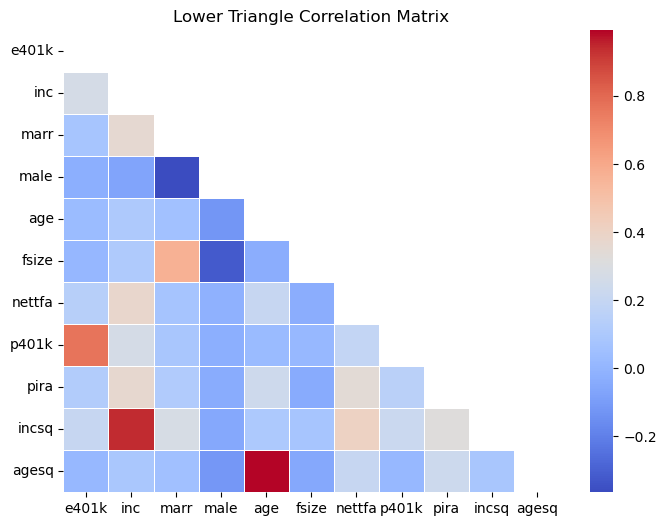

In [71]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix))

# Plot the correlation matrix with only the lower triangle
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Lower Triangle Correlation Matrix')
plt.show()

`nettfa` Net total financial assets has a moderate positive correlation to income. It best predicts one's income.